In [20]:
# Step 1 Data Processing
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("mnist", one_hot=True)
X_train = mnist.train.images
y_train = mnist.train.labels
X_test = mnist.test.images
y_test = mnist.test.labels

Extracting mnist/train-images-idx3-ubyte.gz
Extracting mnist/train-labels-idx1-ubyte.gz
Extracting mnist/t10k-images-idx3-ubyte.gz
Extracting mnist/t10k-labels-idx1-ubyte.gz


In [21]:
X_train.shape

(55000, 784)

In [24]:
y_train.shape

(55000, 10)

In [0]:
X_train = X_train.reshape(-1,28,28)
X_test = X_test.reshape(-1,28,28)

In [28]:
X_train.shape[1:]

(28, 28)

In [0]:
# Step 2 Define Model

from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, GRU

In [0]:
model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1:]), activation='relu'))
# model.add(LSTM(64, input_shape=(28,18), activation='relu'))
model.add(Dense(10,activation='sigmoid'))

In [0]:
# Step 3: Compile Model

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['acc'])

In [36]:
history = model.fit(X_train,y_train, epochs=10,
                   batch_size=100,
                    validation_data=(X_test,y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 55000 samples, validate on 10000 samples
Epoch 1/10
55000/55000 [==============================] - 27s 491us/step - loss: 0.9594 - acc: 0.6758 - val_loss: 0.2879 - val_acc: 0.9126
Epoch 2/10
55000/55000 [==============================] - 22s 409us/step - loss: 0.2268 - acc: 0.9296 - val_loss: 0.2041 - val_acc: 0.9373
Epoch 3/10
55000/55000 [==============================] - 23s 416us/step - loss: 0.1470 - acc: 0.9555 - val_loss: 0.1358 - val_acc: 0.9584
Epoch 4/10
55000/55000 [==============================] - 23s 418us/step - loss: 0.1161 - acc: 0.9645 - val_loss: 0.1011 - val_acc: 0.9685
Epoch 5/10
55000/55000 [==============================] - 23s 422us/step - loss: 0.0972 - acc: 0.9695 - val_loss: 0.0909 - val_acc: 0.9740
Epoch 6/10
55000/55000 [==============================] - 23s 413us/step - loss: 0.0843 - acc: 0.9739 - val_loss: 0.0799 - val_acc: 0.9728
Epoch 7/10
55000/5500

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
losss = history.history['loss']
val_loss = history.history['val_loss']

In [0]:
epochs = range(1,len(acc)+1)

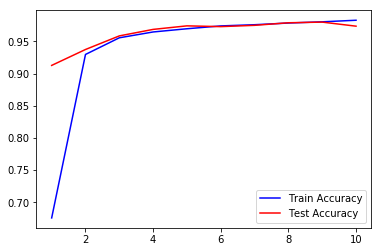

In [39]:
plt.plot(epochs, acc,'b',label='Train Accuracy')
plt.plot(epochs, val_acc,'r',label='Test Accuracy')
plt.legend()
plt.show()